In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from review_analyzer.plots import show_image

show_image('https://i.imgur.com/XLD0c0o.png')

# 1. Descripci√≥n del Problema

El proyecto desarrolla un sistema que analiza emociones y perspectiva (positiva o negativa) en rese√±as online sobre productos y servicios, usando NLP y machine learning, para generar insights √∫tiles a marcas y negocios.

Diccionario de datos
| Variable            | Tipo       | Descripci√≥n |
|---------------------|------------|-------------|
| `user`              | Object    | Nombre de usuario |
| `user_id`           | int    | ID del usuario |
| `text`              | object | Comentario realizado por el usuario |
| `like`              | int  | Cantidad de likes en un comentario |
| `reply_count`       | int    | Cantidad de respuestas en un comentario |
| `timestamp`         | object  | Codigo de la fecha |
| `fecha_legible`     | object  | fecha del comentario realizado |

# 2. Exploraci√≥n general

Dataset: Datos obtenidos mediante consulta a las APIs oficiales de plataformas digitales, integrados y preparados para el EDA y limpieza.

In [3]:
from review_analyzer.config import TIKTOK_COMMENTS
import pandas as pd


In [4]:
df = pd.read_csv(TIKTOK_COMMENTS)
df.head()

user                                            comment  \
0  Joel Equi√±o Espinoza.              le gana sauvage dior ufff perfumaso .   
1            Klaus Heinz    Si lo dice Flavia laos prefiero usar Yanbal üòÖüòÖüòÖ   
2                jozahel  Me dejan el precio ? No me dejen su Wsp que no...   
3      Pilar Acha Mendez                                 Cu√°l es su precio?   
4                  Bas ü´Ä  El olor no perdura, pero si huele muy rico, mu...   

                  time  likes  reply_count                origen  
0  2025-02-21 10:25:01    296           28  comments-perfume.csv  
1  2025-02-21 19:53:11    400           15  comments-perfume.csv  
2  2025-02-21 08:29:51    337           38  comments-perfume.csv  
3  2025-02-21 20:20:06      4           11  comments-perfume.csv  
4  2025-02-21 10:56:35     15           23  comments-perfume.csv

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 0 to 4650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user         4650 non-null   object
 1   comment      4651 non-null   object
 2   time         4651 non-null   object
 3   likes        4651 non-null   int64 
 4   reply_count  4651 non-null   int64 
 5   origen       4651 non-null   object
dtypes: int64(2), object(4)
memory usage: 218.1+ KB


In [6]:
df['comment_length'] = df['comment'].astype(str).apply(len)

In [7]:
from review_analyzer.plots import plot_histo

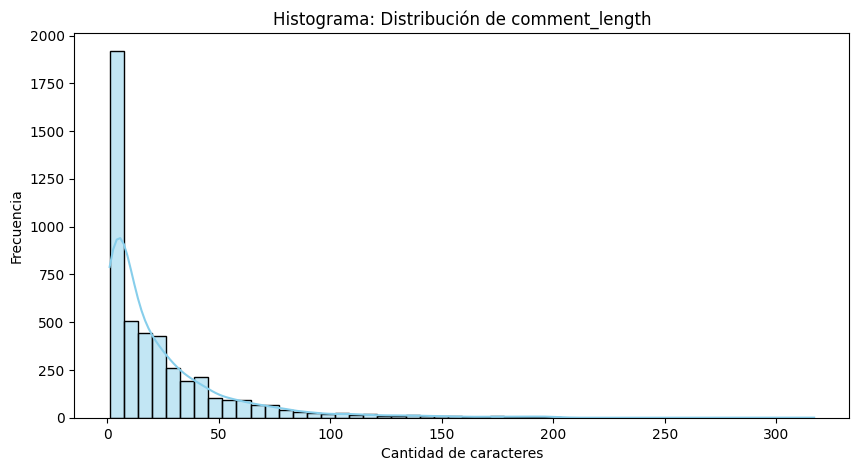

In [8]:
plot_histo(df, 'comment_length')

La gran mayor√≠a de comentarios tienen menos de 20 caracteres.

A partir de los ~100 caracteres, la frecuencia cae casi a cero, y solo aparecen unos pocos comentarios muy largos (outliers).

Tal vez valga la pena establecer un l√≠mite superior de longitud para filtrar entradas irrelevantes.

In [9]:
from review_analyzer.plots import plot_comments_by_time

In [10]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

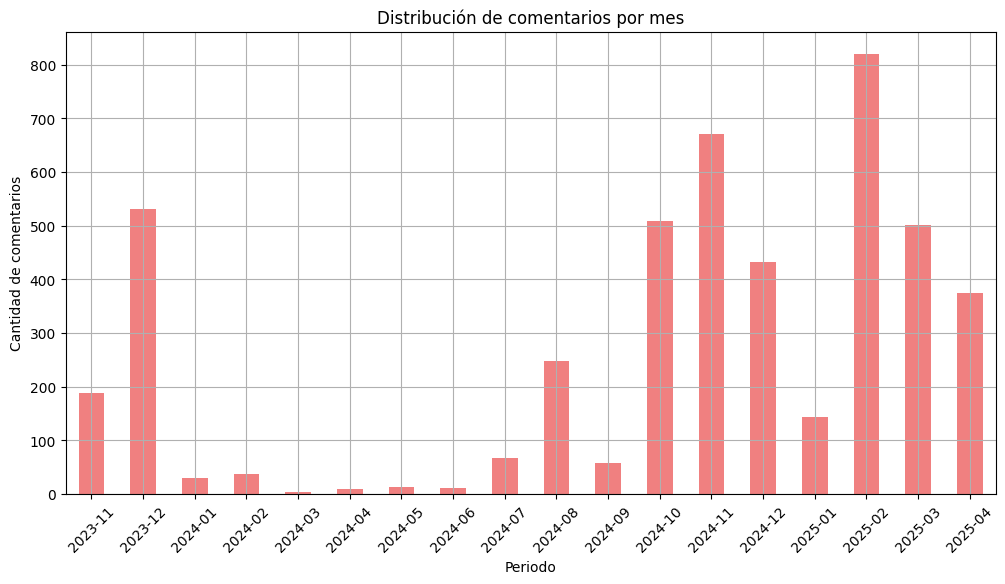

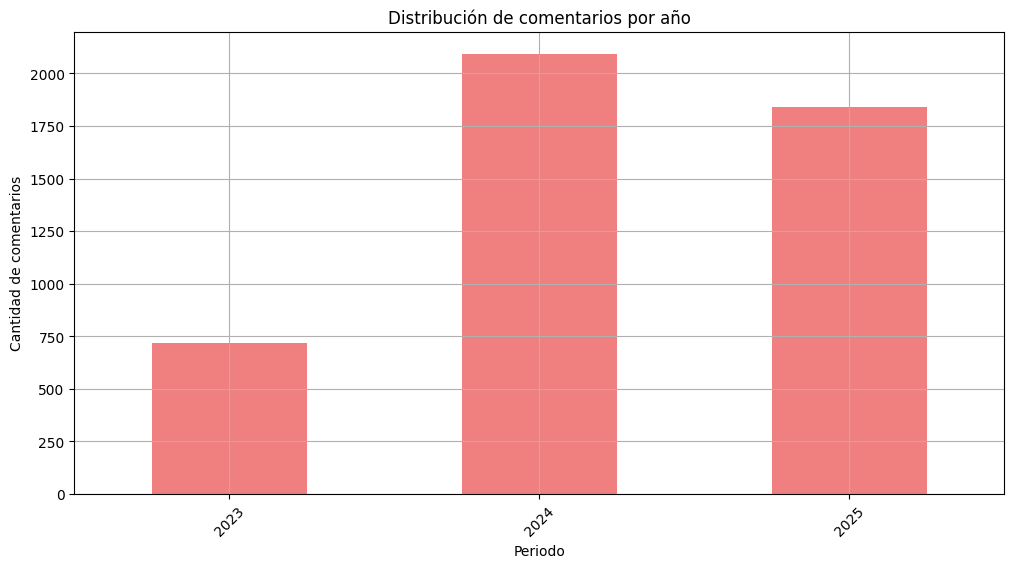

In [11]:
plot_comments_by_time(df, time_column='time', period='M')
plot_comments_by_time(df, time_column='time', period='Y')


Los comentarios no est√°n distribuidos uniformemente en el tiempo: la mayor√≠a de los datos provienen de 2024 y 2025, mientras que 2023 tiene menor representaci√≥n, por lo que es importante considerar el sesgo temporal al analizar y modelar los datos.

In [12]:
df.describe()

time        likes  reply_count  comment_length
count                           4651  4651.000000  4651.000000     4651.000000
mean   2024-10-24 19:16:20.322081280     3.874006     0.199097       23.452376
min              2023-11-29 19:59:12     0.000000     0.000000        1.000000
25%       2024-09-19 16:26:40.500000     0.000000     0.000000        4.000000
50%              2024-11-27 19:27:25     0.000000     0.000000       12.000000
75%              2025-02-22 09:10:39     0.000000     0.000000       31.000000
max              2025-04-30 22:25:32  3140.000000    38.000000      317.000000
std                              NaN    66.311410     1.589186       30.278358

- La mayor√≠a de los comentarios son cortos, sin likes ni respuestas.

- Existen pocos comentarios ‚Äúvirales‚Äù con muchos likes o respuestas, que elevan los m√°ximos y promedios.

- El promedio es 23.45 caracteres, con mediana de 12, lo que indica que la distribuci√≥n est√° sesgada a la derecha (algunos comentarios son muy largos y elevan el promedio).

- El engagement general (likes y replies) es bajo para la mayor√≠a, pero los outliers dominan las m√©tricas agregadas.

In [13]:
from review_analyzer.plots import plot_correlation_scatter

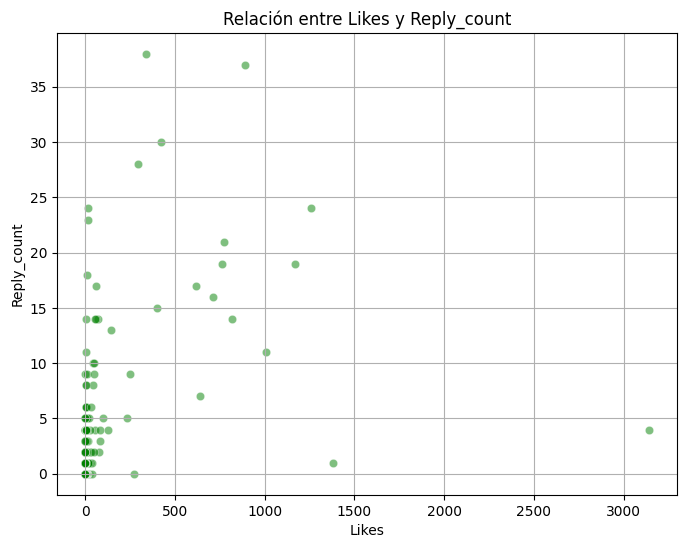

In [14]:
plot_correlation_scatter(df, 'likes', 'reply_count', color='green')

No se observa una correlaci√≥n clara entre likes y reply_count: la mayor√≠a de los comentarios tiene valores bajos, y los casos con muchos likes no muestran un aumento proporcional en respuestas.

In [15]:
from review_analyzer.plots import plot_language_distribution

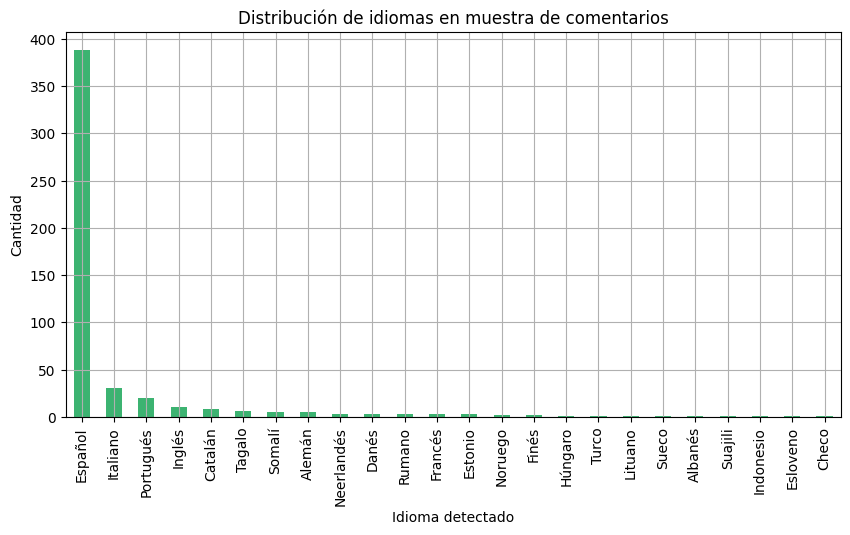

In [16]:
plot_language_distribution(df['comment'], sample_size=500)

La mayor√≠a de los comentarios est√°n en espa√±ol, con muy poca representaci√≥n de otros idiomas; se puede trabajar principalmente sobre datos en espa√±ol sin necesidad de procesamiento multiling√ºe general.

### Resumen general
- La mayor√≠a de los comentarios son cortos (mediana ‚âà12 caracteres) y no generan likes ni respuestas; el engagement promedio es bajo, pero existen outliers que distorsionan las m√©tricas (m√°ximos muy altos).

- Los histogramas muestran una distribuci√≥n sesgada, donde pocos comentarios concentran mucha interacci√≥n.
- El scatterplot entre likes y reply_count sugiere una relaci√≥n d√©bil o ruidosa: la mayor√≠a de los puntos se agrupan en valores bajos, sin una tendencia clara.
- Se recomienda detectar el idioma de los comentarios porque, aunque se asume que la mayor√≠a ser√° en espa√±ol por contexto temporal y geogr√°fico (2024-2025), es necesario confirmarlo para preparar procesos de limpieza y el an√°lisis de sentimiento.

In [17]:
from review_analyzer.config import EXP_SNAPSHOT_PATH

In [18]:
df.to_csv(EXP_SNAPSHOT_PATH, index=False, encoding='utf-8')

# 3. Limpieza y Preprocesamiento



In [19]:
df = pd.read_csv(EXP_SNAPSHOT_PATH)
df.head()

user                                            comment  \
0  Joel Equi√±o Espinoza.              le gana sauvage dior ufff perfumaso .   
1            Klaus Heinz    Si lo dice Flavia laos prefiero usar Yanbal üòÖüòÖüòÖ   
2                jozahel  Me dejan el precio ? No me dejen su Wsp que no...   
3      Pilar Acha Mendez                                 Cu√°l es su precio?   
4                  Bas ü´Ä  El olor no perdura, pero si huele muy rico, mu...   

                  time  likes  reply_count                origen  \
0  2025-02-21 10:25:01    296           28  comments-perfume.csv   
1  2025-02-21 19:53:11    400           15  comments-perfume.csv   
2  2025-02-21 08:29:51    337           38  comments-perfume.csv   
3  2025-02-21 20:20:06      4           11  comments-perfume.csv   
4  2025-02-21 10:56:35     15           23  comments-perfume.csv   

   comment_length  
0              37  
1              47  
2              99  
3              18  
4             126

In [20]:
df.shape

(4651, 7)

In [21]:
import emoji

In [22]:
has_emoji = df['comment'].apply(lambda x: any(char in emoji.EMOJI_DATA for char in x))
df_with_emoji = df[has_emoji]

df_with_emoji[['comment']].head(10)

comment
1      Si lo dice Flavia laos prefiero usar Yanbal üòÖüòÖüòÖ
4    El olor no perdura, pero si huele muy rico, mu...
7                             400 so quien dice Yooo ‚ùì
9                yo soy fiel a mi Axe de chocolate üòåüòåüòå
12         gente sean sincero le gana al one millon?ü§îü§î
74                             No me gusto la verdad üò©
77                             colonia de dj mario üòÆ‚Äçüí®
78                   o me sigue y te paso uno mejor ‚ò∫Ô∏è
111                       precio para mi hijo quiero ü•∫
125  Mano lo compr√© y mis amigos dec√≠an que ol√≠a a ...

Los emojis en solitario suelen contener emociones muy claras (amor, risa, tristeza, enojo), por lo que si no los traducimos, se perder√≠a esa informaci√≥n clave.

In [23]:
from review_analyzer.dataset import clean_basic_text_preserve_emojis

In [24]:
df['comment_cleaned'] = df['comment'].apply(clean_basic_text_preserve_emojis)
df.head()

user                                            comment  \
0  Joel Equi√±o Espinoza.              le gana sauvage dior ufff perfumaso .   
1            Klaus Heinz    Si lo dice Flavia laos prefiero usar Yanbal üòÖüòÖüòÖ   
2                jozahel  Me dejan el precio ? No me dejen su Wsp que no...   
3      Pilar Acha Mendez                                 Cu√°l es su precio?   
4                  Bas ü´Ä  El olor no perdura, pero si huele muy rico, mu...   

                  time  likes  reply_count                origen  \
0  2025-02-21 10:25:01    296           28  comments-perfume.csv   
1  2025-02-21 19:53:11    400           15  comments-perfume.csv   
2  2025-02-21 08:29:51    337           38  comments-perfume.csv   
3  2025-02-21 20:20:06      4           11  comments-perfume.csv   
4  2025-02-21 10:56:35     15           23  comments-perfume.csv   

   comment_length                                    comment_cleaned  
0              37               le gana sauvage dior ufff perfumaso.  
1              47        Si lo dice Flavia laos prefiero usar Yanbal  
2              99  Me dejan el precio? No me dejen su Wsp que no ...  
3              18                                 Cu√°l es su precio?  
4             126  El olor no perdura, pero si huele muy rico, mu...

In [25]:
df['comment'] = df['comment_cleaned']
df.drop(columns=['comment_cleaned'], inplace=True)

In [26]:
df.shape

(4651, 7)

In [27]:
df['word_count'] = df['comment'].str.split().apply(len)

In [28]:
df[df['word_count'] < 5][['comment']].sample(20, random_state=42)

comment
4647           Es delicioso
334                  Precio
522             Precio bro?
1388                       
4328        Witsel Mejia Dy
2590            richarlizon
341                 Perfume
4451                 precio
1905         en este Casio?
2350                       
370   Ayud√© a perfeccionar.
4288                  photo
2581                 precio
946                 perfume
2951        Santos Lizana L
410                  Precio
3424          Quiero yo uno
988             informaci√≥n
1327                       
1323

In [29]:
word_count = 20
samples = 20

In [30]:
subset = df[df['word_count'] > word_count][['comment']].sample(20, random_state=42)
for c in subset['comment']:
    print(c, '\n' + '-' * 80)

son fake as√≠ no vienen esas jordan 4 retro yo me compre una ac√° en la misma nike ac√° en eeuu y es diferente 
--------------------------------------------------------------------------------
la verdad si son buenas pero hay de calidad buena y mala la verdad el mejor peeo mas caro es Sony despues LG 
--------------------------------------------------------------------------------
yo lo tengo y me encanta. ahora comprendo, tengo 50 a√±os. a√∫n as√≠, hay que recordar que depende mucho de nuestro PH!. bendiciones hermosas!! 
--------------------------------------------------------------------------------
El primero me encanta, te lo he visto y lo he buscado en amazon, lo he comprado por 53! Gracias amigo! 
--------------------------------------------------------------------------------
todas las marcas de televisi√≥nes tienes sus gamas de entrada, media y premium TODAS. no pueden comparar una gama de entrada de x marca con una gama premium. Al final siempre va ganar LG en tecnolog√≠a. 
-

Comentarios muy cortos (<3 palabras) ‚Üí si son solo emojis, se conservan; si son palabras gen√©ricas, pueden filtrarse por baja relevancia.

Comentarios muy largos (>100 palabras) ‚Üí aunque raros, muestran opiniones detalladas con carga emocional; se conservan tras revisi√≥n, no se eliminan autom√°ticamente.

In [31]:
df.head()

user                                            comment  \
0  Joel Equi√±o Espinoza.               le gana sauvage dior ufff perfumaso.   
1            Klaus Heinz        Si lo dice Flavia laos prefiero usar Yanbal   
2                jozahel  Me dejan el precio? No me dejen su Wsp que no ...   
3      Pilar Acha Mendez                                 Cu√°l es su precio?   
4                  Bas ü´Ä  El olor no perdura, pero si huele muy rico, mu...   

                  time  likes  reply_count                origen  \
0  2025-02-21 10:25:01    296           28  comments-perfume.csv   
1  2025-02-21 19:53:11    400           15  comments-perfume.csv   
2  2025-02-21 08:29:51    337           38  comments-perfume.csv   
3  2025-02-21 20:20:06      4           11  comments-perfume.csv   
4  2025-02-21 10:56:35     15           23  comments-perfume.csv   

   comment_length  word_count  
0              37           6  
1              47           8  
2              99          19  
3              18           4  
4             126          25

### Extracci√≥n de embeddings BERT

En este paso usamos un modelo BERT para convertir los comentarios textuales en representaciones num√©ricas (embeddings). 

Estos vectores capturan informaci√≥n sem√°ntica, incluyendo contexto, tono y significado, y servir√°n como entrada para los modelos de an√°lisis emocional.


In [32]:
from review_analyzer.dataset import extract_bert_embeddings

In [36]:
comments = df['comment'].tolist()

In [38]:
bert_embeddings = extract_bert_embeddings(comments, batch_size=16)

In [41]:
from review_analyzer.config import BERT_EMBEDDINGS

In [40]:
import numpy as np

In [42]:
np.save(BERT_EMBEDDINGS, bert_embeddings)

#### Resumen

El dataset ha sido limpiado y preprocesado para usar con BERT:
- Solo limpieza m√≠nima aplicada (URLs, hashtags, menciones).
- Emojis y may√∫sculas preservados.
- No se aplic√≥ stopword removal, lematizaci√≥n ni tokenizaci√≥n manual.
- Embeddings BERT generados y guardados.

# 4. An√°lisis Exploratorio de Datos (EDA)

Comprender el dataset y su distribuci√≥n para tomar decisiones del modelo.

In [ ]:
df.iloc[419]

user                             ab_17
comment               Sotelo la boca üò£
time               2025-03-28 23:44:36
likes                                1
reply_count                          0
origen            comments-perfume.csv
comment_length                      24
word_count                           4
Name: 419, dtype: object